# **Credit Card Fraud Detection**
# Background
Credit card fraud is a significant issue faced by financial
institutions and customers worldwide. Fraudulent
transactions can lead to substantial financial losses and
undermine consumer trust in digital payment systems. With
the increasing volume and sophistication of fraudulent
activities, there is a pressing need for robust and efficient
detection mechanisms. Data science, particularly machine
learning, offers powerful tools to identify suspicious
transactions and reduce the incidence of fraud.
# Objective
The primary objective of this project is to develop a machine
learning model that accurately detects fraudulent credit card
transactions using a historical dataset. The model should be
capable of distinguishing between legitimate and fraudulent
transactions in real time, minimizing false positives and
false negatives to protect both customers and financial
institutions.

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

The dataset contains transactions made by European
cardholders in September 2013. It includes transactions that
occurred over two days, with 492 frauds out of 284,807
transactions, making the dataset highly unbalanced. The
positive class (frauds) accounts for only 0.172% of all
transactions.
The dataset comprises only numerical input variables
resulting from a PCA transformation. Due to confidentiality
issues, the original features and more background
information about the data are not provided. Features V1,
V2, ... V28 are the principal
components obtained with PCA. The only features not
transformed with PCA are:

1.Time: The seconds elapsed between each
transaction and the first transaction in the dataset.
2.Amount: The transaction amount, which can be
used for example-dependent cost-sensitive learning.
3.Class: The response variable, taking a value of 1 in
case of fraud and 0 otherwise.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_card = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing


In [ ]:
print('No. of missing values in the given dataset is ', credit_card.isnull().sum().sum())

No. of missing values in the given dataset is  0


In [ ]:
# Normalization and Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_card["Time"] = scaler.fit_transform(credit_card[["Time"]])
credit_card["Amount"] = scaler.fit_transform(credit_card[["Amount"]])
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Exploratory Data Analysis

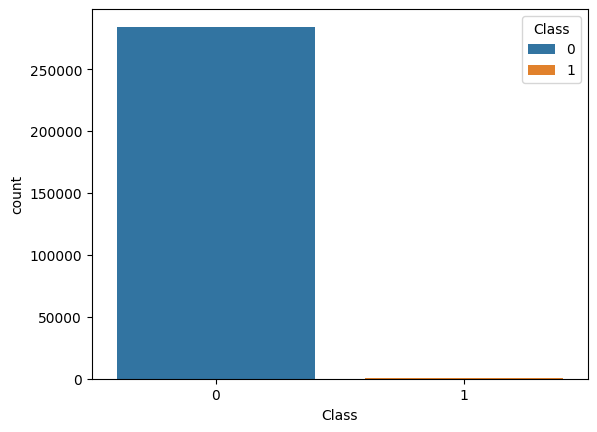

In [ ]:
sns.countplot(x='Class', data=credit_card, hue='Class')
plt.show()

**Interpretation:** This shows that only 12.7% of total transactions are fraudulent. In other words, we can say that, there are more number of normal transactions compared to the fradulent ones.

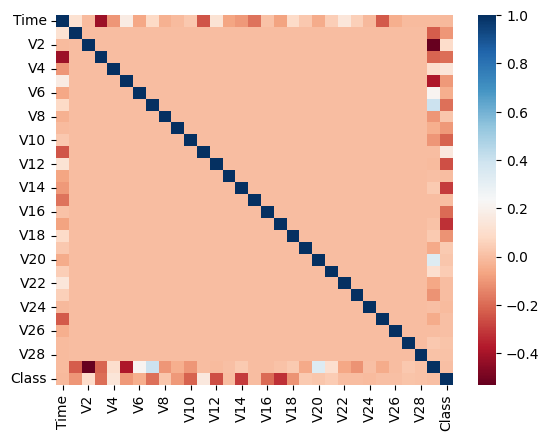

In [ ]:
corr_matrix = credit_card.corr()
sns.heatmap(corr_matrix, cmap='RdBu')
plt.show()

In [ ]:
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

# Feature Engineering

In [ ]:
X = credit_card.drop(['Time', 'Class'], axis=1)
Y = credit_card['Class']

# Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score, classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)
print('Training data: ', X_train.shape, Y_train.shape)
print('Testing data: ', X_test.shape, Y_test.shape)

Training data:  (227845, 29) (227845,)
Testing data:  (56962, 29) (56962,)


## **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# define the model
logistic = LogisticRegression()
# train the model
logistic.fit(X_train, Y_train)
# testing the model
results = logistic.predict(X_test)
results[0:5]
# probabilities
res_prob = logistic.predict_proba(X_test)[:,1]
res_prob[0:5]

array([4.01840462e-05, 3.96765133e-05, 7.55076836e-07, 1.29127335e-04,
       8.73598809e-03])

## 2. **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the data
rf.fit(X_train, Y_train)
# test the data
results = rf.predict(X_test)
results[0:5]

array([0, 0, 0, 0, 0])

## **3. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# define the model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#train
gb_clf.fit(X_train, Y_train)
# test
results = gb_clf.predict(X_test)
results[0:5]
#probs
res_prob = gb_clf.predict_proba(X_test)[:,1]
res_prob[0:5]

array([0.00028655, 0.00028655, 0.00028655, 0.00028655, 0.00028655])

## **4. Neural network**

In [ ]:
from sklearn.neural_network import MLPClassifier
#define
mlp = MLPClassifier(max_iter=1000, random_state=42)
#fit
mlp.fit(X_train, Y_train)
#test
results = mlp.predict(X_test)
results[0:5]
#probability
res_prob = mlp.predict_proba(X_test)[:,1]
res_prob[0:5]

array([3.69841033e-08, 4.64984025e-08, 1.02542525e-11, 8.84994733e-08,
       1.07864947e-03])

### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning

#logistic regression
c = [0.01, 0.1, 1, 10]
acc = []
for i in c:
  lr = LogisticRegression(C=i)
  lr.fit(X_train, Y_train)
  results = lr.predict(X_test)
  acc.append(accuracy_score(Y_test, results))
print('The value of C for the best accuracy is ', c[np.argmax(acc)], ' with the accuracy ', np.max(acc))
# best_estimates

best_lr = LogisticRegression(C=c[np.argmax(acc)])
best_lr.fit(X_train, Y_train)
pred = best_lr.predict(X_test)
print('Accuracy with best value of C is ', accuracy_score(Y_test, pred))

The value of C for the best accuracy is  1  with the accuracy  0.9991748885221726
Accuracy with best value of C is  0.9991748885221726


In [38]:
# Random forest classifier
params = {
    'n_estimators': [10,25,50],
    'max_depth': [6,12,18]
}
#grid search
grid_ser = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_ser.fit(X_train, Y_train)
print('Random forest classifier: ')
print('Best parameters: ', grid_ser.best_params_)
print('Best estimators: ', grid_ser.best_estimator_)
print('Best score: ', grid_ser.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Random forest classifier: 
Best parameters:  {'max_depth': 18, 'n_estimators': 25}
Best estimators:  RandomForestClassifier(max_depth=18, n_estimators=25, random_state=42)
Best score:  0.9995040486509875


In [40]:
best_clf = RandomForestClassifier(max_depth=18, n_estimators=25, random_state=42)
best_clf.fit(X_train, Y_train)
pred = best_clf.predict(X_test)
print('Accuracy with best parameters is ', accuracy_score(Y_test, pred))

Accuracy with best parameters is  0.9996137776061234


In [ ]:
#Gradient boosting classifier
grid_ser = GridSearchCV(estimator=gb_clf, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_ser.fit(X_train, Y_train)
print('Gradient boosting classifier: ')
print('Best parameters: ', grid_ser.best_params_)
print('Best estimators: ', grid_ser.best_estimator_)
print('Best score: ', grid_ser.best_score_)
best_clf1 = GradientBoostingClassifier(max_depth=18, n_estimators=25, random_state=42)
best_clf1.fit(X_train, Y_train)
preds = best_clf1.predict(X_test)
print('Accuracy with best parameters: ', accuracy_score(Y_test, preds))

# Model Evaluation

### Logistic Regression

Accuracy score:  0.9991748885221726
Classification report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Precision - Recall curve: 



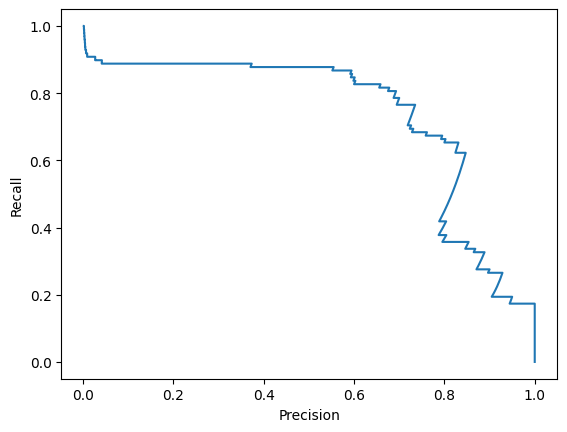

F1 score:  0.7314285714285713
ROC score:  0.9558809490312727


In [ ]:
# Evaluating the model
# Accuracy
print('Accuracy score: ', accuracy_score(Y_test, results))
# Classification report
print('Classification report: \n ', classification_report(Y_test, results))
# Precision - recall curve
print('Precision - Recall curve: \n')
prec, rec, thres = precision_recall_curve(Y_test, res_prob)
plt.plot(prec, rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
# F1 score
print('F1 score: ', f1_score(Y_test, results))
# ROC score
print('ROC score: ', roc_auc_score(Y_test, res_prob))

### Random Forest Classifier

Accuracy score:  0.9996137776061234
Classification report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Precision - Recall curve: 



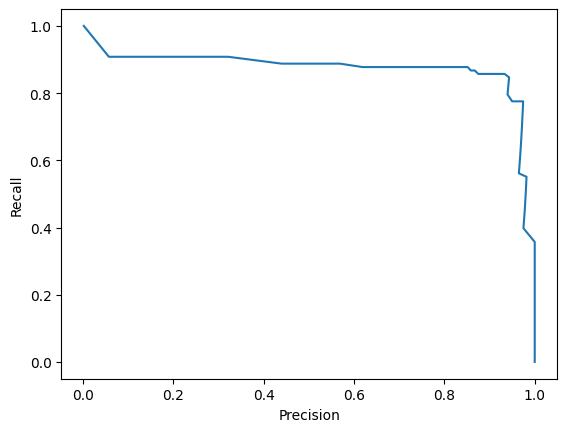

F1 score:  0.8804347826086957
ROC score:  0.9528106983508091


In [ ]:
res_prob = rf.predict_proba(X_test)[:,1]
res_prob[0:5]
# Evaluating the model for ranfom forest
# Accuracy
print('Accuracy score: ', accuracy_score(Y_test, results))
# Classification report
print('Classification report: \n ', classification_report(Y_test, results))
# Precision - recall curve
print('Precision - Recall curve: \n')
prec, rec, thres = precision_recall_curve(Y_test, res_prob)
plt.plot(prec, rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
# F1 score
print('F1 score: ', f1_score(Y_test, results))
# ROC score
print('ROC score: ', roc_auc_score(Y_test, res_prob))

### Gradient Boosting Classifier

Accuracy score:  0.9983146659176293
Classification report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962

Precision - Recall curve: 



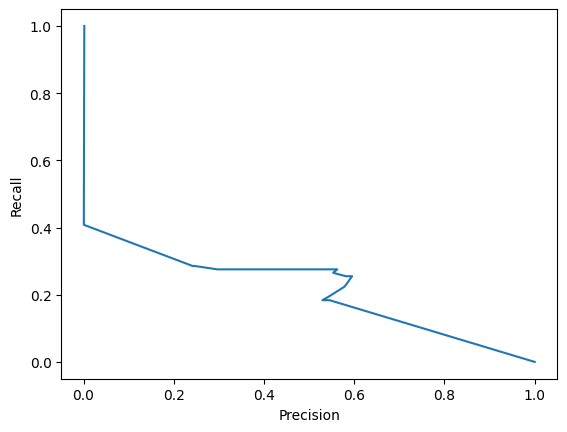

F1 score:  0.27272727272727276
ROC score:  0.3468859283302516


In [ ]:
# Evaluating the gradient boosting classifier
# Accuracy
print('Accuracy score: ', accuracy_score(Y_test, results))
# Classification report
print('Classification report: \n ', classification_report(Y_test, results))
# Precision - recall curve
print('Precision - Recall curve: \n')
prec, rec, thres = precision_recall_curve(Y_test, res_prob)
plt.plot(prec, rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
# F1 score
print('F1 score: ', f1_score(Y_test, results))
# ROC score
print('ROC score: ', roc_auc_score(Y_test, res_prob))

### Neural network

Accuracy score:  0.9994382219725431
Classification report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.81      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision - Recall curve: 



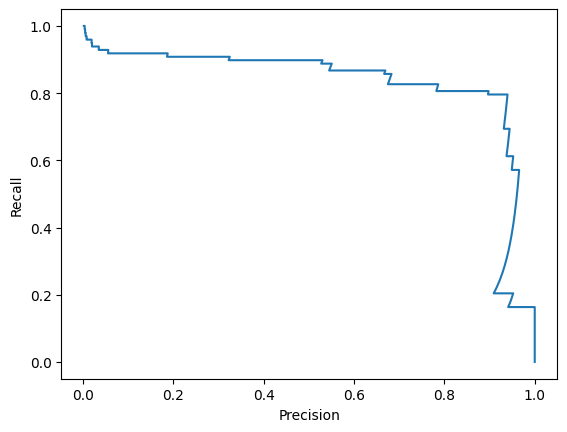

F1 score:  0.8315789473684211
ROC score:  0.9837519595626658


In [ ]:
# Evaluating the neural network
# Accuracy
print('Accuracy score: ', accuracy_score(Y_test, results))
# Classification report
print('Classification report: \n ', classification_report(Y_test, results))
# Precision - recall curve
print('Precision - Recall curve: \n')
prec, rec, thres = precision_recall_curve(Y_test, res_prob)
plt.plot(prec, rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
# F1 score
print('F1 score: ', f1_score(Y_test, results))
# ROC score
print('ROC score: ', roc_auc_score(Y_test, res_prob))

# Report on the accuracy of various models after performing hyperparameter tuning

## **1. Logistic Regression:**
    1.   Accuracy: 0.9991
    2.   Precision: 0.83
    3.   Recall: 0.65
    4.   F1-score:   0.73
## **2. Random Forest Classifier:**
    1.   Accuracy: 0.9996
    2.   Precision: 0.94
    3.   Recall: 0.83
    4.   F1-score: 0.88
## **3. Gradient Boosting Classifier:**
    1.   Accuracy: 0.9983
    2.   Precision: 0.53
    3.   Recall: 0.18
    4.   F1-score:   0.27
## **4. Neural network:**
    1.   Accuracy: 0.9994
    2.   Precision: 0.86
    3.   Recall: 0.81
    4.   F1-score: 0.83





# **THANK YOU!!**